We need to have make sure you have data set "community_first_ever_contribution.csv" first to run this file

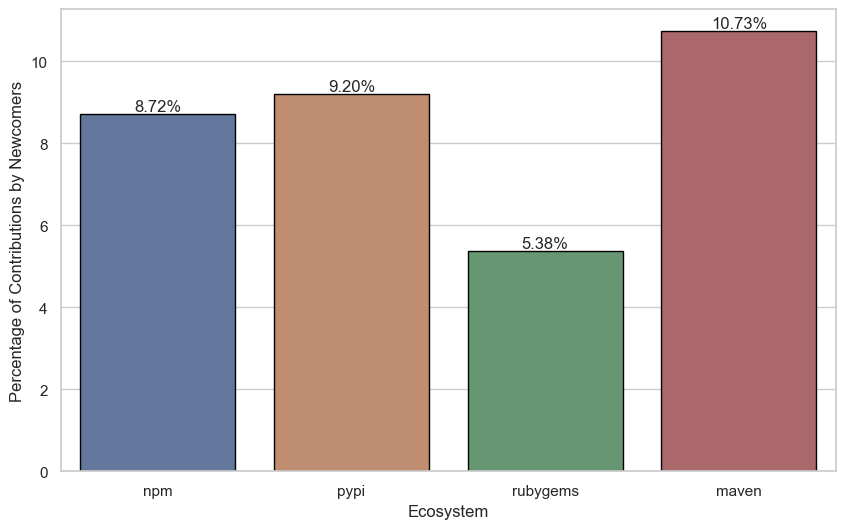

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
first_ever_df = pd.read_csv('community_first_ever_contribution.csv')

# Filter out rows where 'Bot' or 'bot' is not present in the 'userlogin' column
filtered_df = first_ever_df[~first_ever_df['userlogin'].str.contains('Bot|bot', case=False)]

# Filter further to get rows where 'total_count' is 0
filtered_df_with_zero_past_pr = filtered_df[filtered_df['total_count'] == 0]

# Define custom order for 'ecosystem'
custom_order = ['npm', 'pypi', 'rubygems', 'maven']

# Calculate the percentage by ecosystem
percentage_by_ecosystem = (filtered_df_with_zero_past_pr.groupby('ecosystem').size() / filtered_df.groupby('ecosystem').size()[custom_order]) * 100

# Define custom colors for each ecosystem
custom_colors = ['#5975a4', '#cc8963', '#5f9e6e', '#b55d60']

# Set seaborn style and palette
sns.set(style="whitegrid")
sns.set_palette(custom_colors)

# Create a bar plot with seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_by_ecosystem.index, y=percentage_by_ecosystem.values, order=custom_order, edgecolor='black')

# Set labels and title
plt.xlabel('Ecosystem')
plt.ylabel('Percentage of Contributions by Newcomers')

# Add values at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()
